In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')

import pandas as pd
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [6]:

#1 Проверка типов данных столбцов
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


In [8]:
#2 Сразу переведем столбец "Дата" в правильный формат

df['Дата'] = pd.to_datetime(df['Дата'])
print(df.dtypes)

print(df.head())

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object
        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2


In [38]:
#3 Вывести несколько первых строк сгруппированных данных

df_grouped = df.groupby('Дата')['Количество'].sum()
print(df_grouped)

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
              ... 
2018-08-26    5302
2018-08-28    5983
2018-08-29    4969
2018-08-30    4648
2018-08-31    4570
Name: Количество, Length: 205, dtype: int64


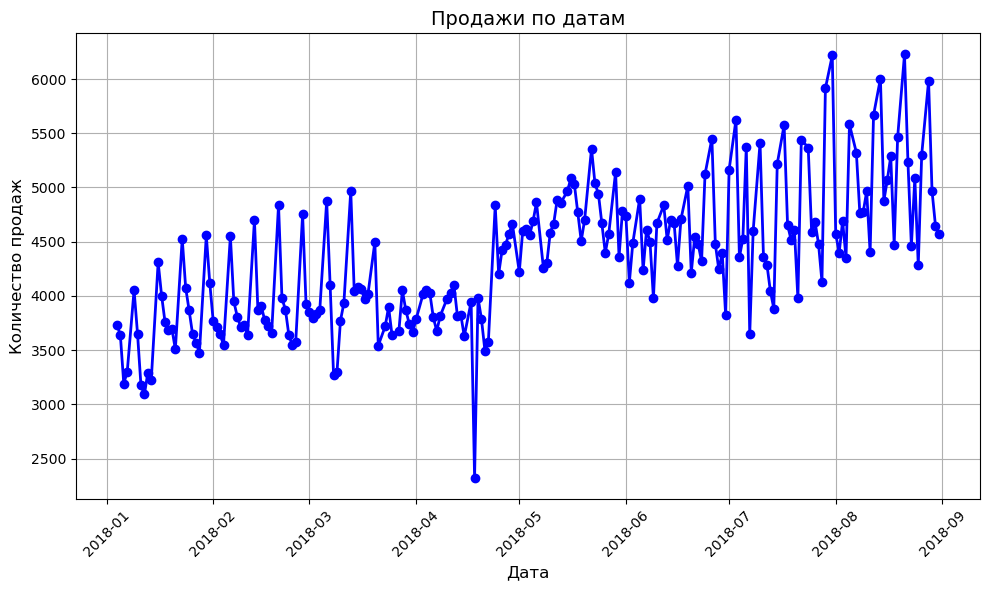

In [20]:
#4  Нарисуйте график продаж у grouped_df

plt.figure(figsize=(10, 6)) 
plt.plot(df_grouped, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Продажи по датам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
#5 Опишите что вы видите на графике. Ваша задача - максимально описать график

График показывает кол-во продаж по датам. Ось X -  даты, а на Оси Y — кол-во продаж.
Мы можем заметить некоторые колебания в кол-ве продаж по датам, показывая, как кол-во продаж меняется с каждым днем,
что свидетельствует о влиянии различных факторов на продажи в эти дни (допустим: акции, праздники или особенности спроса).
График помогает выявить колебания или пики продаж, а также анализировать сезонность и поведение рынка. 


In [24]:
#6 Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у df)

Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier = outliers.loc[outliers['Количество'].idxmax()]

print("Строка с максимальным выбросом по количеству продаж:")
print(max_outlier)

Строка с максимальным выбросом по количеству продаж:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


In [28]:
#7 Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада


df['Дата'] = pd.to_datetime(df['Дата'])

df_filtered = df[df['Дата'].dt.month.isin([6, 7, 8])]

df_filtered = df_filtered[df_filtered['Дата'].dt.weekday == 2]  

df_grouped1 = df_filtered.groupby(['Склад', 'Номенклатура'])['Количество'].sum().reset_index()

top_products = df_grouped1.loc[df_grouped1.groupby('Склад')['Количество'].idxmax()]
print(top_products)

    Склад Номенклатура  Количество
1       1    product_1        2981
24      2    product_1        2887
46      3    product_1        2267
69      4    product_1        2385
92      5    product_1        1956


In [32]:
# Погода в Астане (1.Шаг: поработаем с загруженным файлом. так как много неточностей)

df_weather = pd.read_excel('weather.xls')

print(df_weather.head())
df_weather['Дата'] = pd.to_datetime(df_weather['Дата'])

        Дата     T
0 2018-08-31   9.6
1 2018-08-31  11.3
2 2018-08-31  12.3
3 2018-08-31  13.2
4 2018-08-31  12.5


In [40]:
# Погода в Астане (3.Шаг:соеединим данные о продажах с погодой по дате)
merged_df = pd.merge(df_grouped, df_weather, on='Дата')
merged_df


,Дата,Количество,T
0,2018-01-04,3734,-17.2
1,2018-01-04,3734,-14.5
2,2018-01-04,3734,-9.6
3,2018-01-04,3734,-12.3
4,2018-01-04,3734,-12.6
...,...,...,...
1634,2018-08-31,4570,13.2
1635,2018-08-31,4570,12.5
1636,2018-08-31,4570,10.3
1637,2018-08-31,4570,10.8


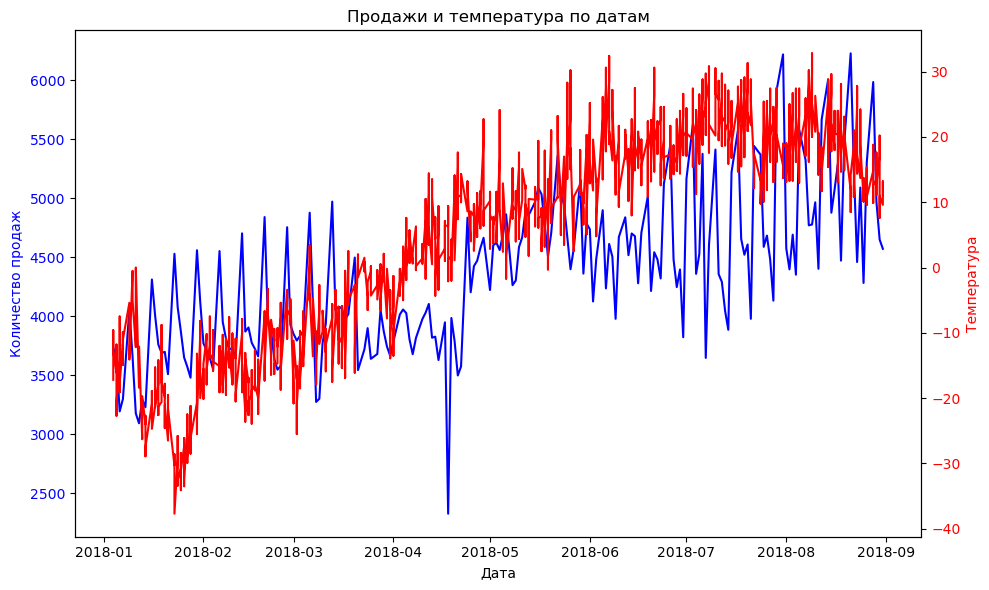

In [42]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_df['Дата'], merged_df['Количество'], label='Количество продаж', color='b')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='r')
ax2.set_ylabel('Температура', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Продажи и температура по датам')
fig.tight_layout()
plt.show()

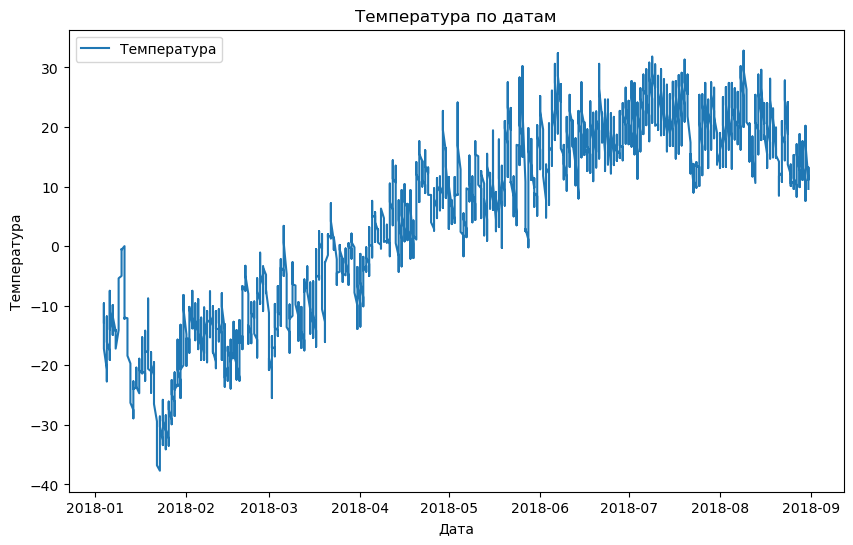

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(df_weather['Дата'], df_weather['T'], label='Температура')
plt.title('Температура по датам')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.legend()
plt.show()